<a href="https://colab.research.google.com/github/yasithS/DiseasePrediction/blob/main/diseasePredictionAtt2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### importing libraries

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_selection import SelectFromModel

### Loading the daraset

In [23]:
df = pd.read_csv('dataset.csv')

In [24]:
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data Preprocessing

In [25]:
# filling Nan values with empty strings
df.fillna('', inplace=True)


In [26]:
df.head(5)

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,,,,,,,,,,,,,
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,,,,,,,,,,,,,,
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,,,,,,,,,,,,,,
3,Fungal infection,itching,skin_rash,dischromic _patches,,,,,,,,,,,,,,
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,,,,,,,,,,,,,,


In [27]:
#shape
df.shape

(4920, 18)

In [28]:
# remove duplicates
df['symptom_set'] = df.iloc[:, 1:].apply(
    lambda row: '|'.join(sorted([str(s) for s in row if s != ''])),
    axis=1
)

In [29]:
df['symptom_set'].head()

,symptom_set
0,dischromic _patches| nodal_skin_eruptions| sk...
1,dischromic _patches| nodal_skin_eruptions| sk...
2,dischromic _patches| nodal_skin_eruptions|itc...
3,dischromic _patches| skin_rash|itching
4,nodal_skin_eruptions| skin_rash|itching


In [30]:
# remove duplicates based on disease and symptom test
df = df.drop_duplicates(subset=['Disease', 'symptom_set'])

In [31]:
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17,symptom_set
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,,,,,,,,,,,,,,dischromic _patches| nodal_skin_eruptions| sk...
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,,,,,,,,,,,,,,,dischromic _patches| nodal_skin_eruptions| sk...
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,,,,,,,,,,,,,,,dischromic _patches| nodal_skin_eruptions|itc...
3,Fungal infection,itching,skin_rash,dischromic _patches,,,,,,,,,,,,,,,dischromic _patches| skin_rash|itching
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,,,,,,,,,,,,,,,nodal_skin_eruptions| skin_rash|itching


In [32]:
#drop the symptom_set column
df.drop(columns=['symptom_set'], inplace=True)


In [35]:
# shape after removing duplicates
df.shape

(304, 18)

In [36]:
# extract all symptoms
symptom_columns = [col for col in df.columns if col.startswith('Symptom_')]

In [38]:
print(symptom_columns)

['Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4', 'Symptom_5', 'Symptom_6', 'Symptom_7', 'Symptom_8', 'Symptom_9', 'Symptom_10', 'Symptom_11', 'Symptom_12', 'Symptom_13', 'Symptom_14', 'Symptom_15', 'Symptom_16', 'Symptom_17']


In [39]:
# getting all unique symptoms
unique_symptoms = set()
for column in symptom_columns:
  symptoms = df[column].str.strip()
  unique_symptoms.update(symptoms[symptoms != ''].unique())
if '' in unique_symptoms:
    unique_symptoms.remove('')
all_symptoms = sorted(list(unique_symptoms))
print(f"Number of unique symptoms: {len(all_symptoms)}")

Number of unique symptoms: 131


In [42]:
# Reset index after removing duplicates
df = df.reset_index(drop=True)

X = np.zeros((len(df), len(all_symptoms)))
for i, row in df.iterrows():
  for column in symptom_columns:
        symptom = row[column].strip()
        if symptom:  # If not empty
            try:
                symptom_index = all_symptoms.index(symptom)
                X[i, symptom_index] = 1
            except ValueError:
                # Handle the case where a symptom in the data isn't in our list
                print(f"Warning: Symptom '{symptom}' not found in all_symptoms list")

In [45]:
# encode the disease
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['Disease'])

In [44]:
print(y)

[15 15 15 15 15  4  4  4  4  4 16 16 16 16 16 16 16  9  9  9  9  9  9  9
  9 14 14 14 14 14 14 33 33 33 33 33 33 33  1  1  1  1  1 12 12 12 12 12
 12 12 12 12 17 17 17 17 17  6  6  6  6  6  6  6 23 23 23 23 23 23 30 30
 30 30 30 30 30 30 30 30  7  7  7  7  7  7 32 32 32 32 32 28 28 28 28 28
 28 28 28 28 29 29 29 29 29 29 29 29  8  8  8  8  8  8  8  8  8  8 11 11
 11 11 11 11 11 11 11 11 37 37 37 37 37 37 37 37 37 40 40 40 40 40 40 40
 40 40 19 19 19 19 19 19 19 19 19 20 20 20 20 20 20 20 21 21 21 21 21 21
 21 21 21 21 22 22 22 22 22 22 22 22 22  3  3  3  3  3  3  3  3 36 36 36
 36 36 36 36 36 36 10 10 10 10 10 10 10 10 10 34 34 34 34 34 34 34 34 34
 13 13 13 13 13 13 18 18 18 18 18 39 39 39 39 39 39 39 39 26 26 26 26 26
 26 26 26 24 24 24 24 24 24 24 24 24 25 25 25 25 25 25 25 25 25 31 31 31
 31 31 31 31  5  5  5  5  5  5  0  0  0  0  0  0  0  2  2  2  2  2 38 38
 38 38 38 35 35 35 35 35 35 35 27 27 27 27 27 27]


In [46]:
# Store the mapping for later reference
disease_mapping = dict(zip(range(len(label_encoder.classes_)), label_encoder.classes_))

In [47]:
# Feature selection using feature importance
selector = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42), threshold="mean")
X_selected = selector.fit_transform(X, y)
selected_feature_indices = selector.get_support(indices=True)
selected_symptoms = [all_symptoms[i] for i in selected_feature_indices]
print(f"Selected {len(selected_symptoms)} features out of {len(all_symptoms)}")


Performing feature selection...
Selected 53 features out of 131


### Data splitting

In [50]:
# Split data ensuring similar distribution of classes
# Use stratified split to maintain class distribution
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42, stratify=y)

In [51]:
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

Training set shape: (243, 53)
Test set shape: (61, 53)


### Train the model

In [52]:
model = RandomForestClassifier(
    n_estimators=200,           # More trees for better generalization
    max_depth=None,             # Allow trees to grow fully
    min_samples_split=5,        # Minimum samples required to split a node
    min_samples_leaf=2,         # Minimum samples required at a leaf node
    max_features='sqrt',        # Use sqrt of total features for each split
    bootstrap=True,             # Use bootstrap samples
    class_weight='balanced',    # Handle class imbalance
    random_state=42
)


In [53]:
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', min_samples_leaf=2,
                       min_samples_split=5, n_estimators=200, random_state=42)

### Make Predictions

In [54]:
y_pred = model.predict(X_test)

### Calculate the accuracy

In [55]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.4f}")


Model Accuracy: 0.9836


### Cross-validation with stratification

In [56]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_selected, y, cv=cv, scoring='accuracy')
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV accuracy: {cv_scores.mean():.4f}")
print(f"Standard deviation: {cv_scores.std():.4f}")

Cross-validation scores: [0.96721311 0.93442623 0.96721311 0.96721311 0.91666667]
Mean CV accuracy: 0.9505
Standard deviation: 0.0212


In [57]:
# Generate classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


Classification Report:
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         2
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       1.00      1.00      1.00         2
                    Chronic cholestasis       1.00      1.00      1.00         2
                            Common Cold       1.00      1.00      1.00         2
   

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [58]:
# Feature importance
feature_importances = model.feature_importances_
feature_names = [all_symptoms[i] for i in selected_feature_indices]
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importances
}).sort_values('importance', ascending=False)


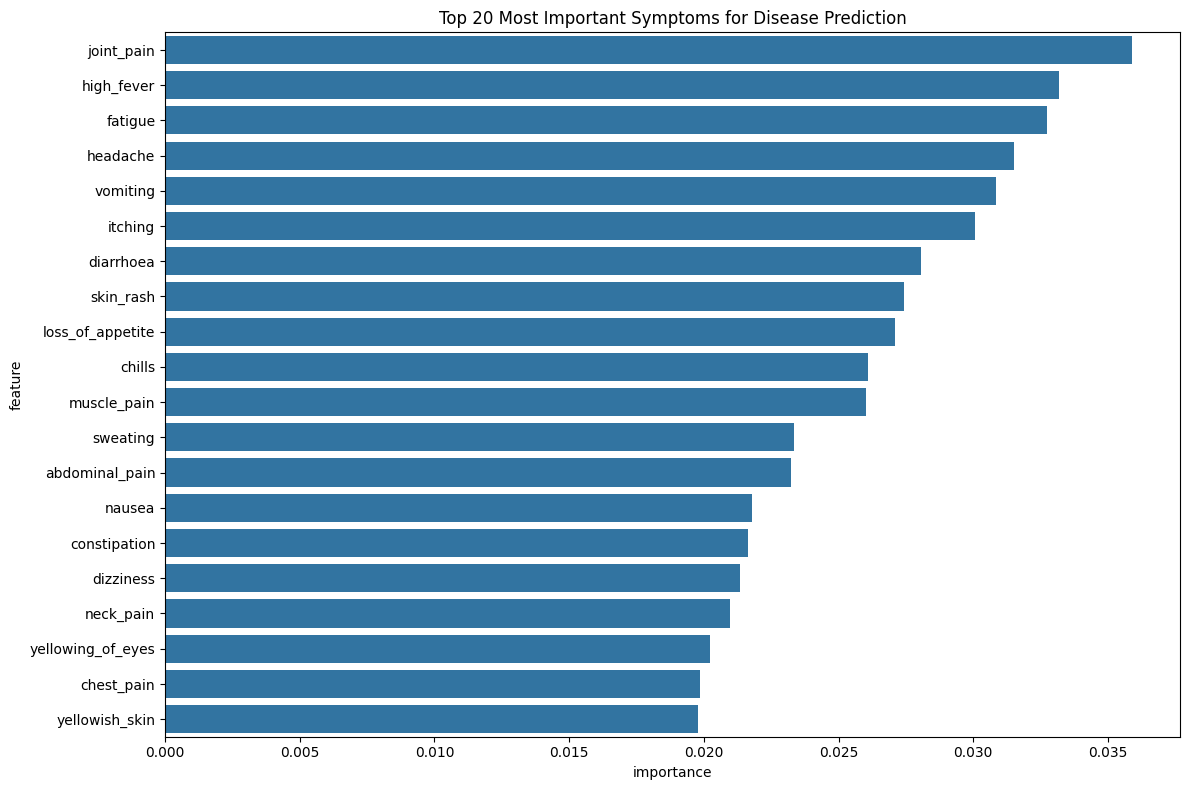

In [59]:
# Plot top 20 important features
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=importance_df.head(20))
plt.title('Top 20 Most Important Symptoms for Disease Prediction')
plt.tight_layout()
plt.savefig('feature_importance.png')

In [60]:
# Function to predict disease from symptoms
def predict_disease(symptoms_list):
    # Convert input symptoms to feature vector
    input_features = np.zeros(len(selected_feature_indices))
    for symptom in symptoms_list:
        if symptom in selected_symptoms:
            idx = selected_symptoms.index(symptom)
            input_features[idx] = 1

    # Predict using the model
    prediction = model.predict([input_features])[0]
    disease = disease_mapping[prediction]

    # Get probabilities for top 3 predictions
    probabilities = model.predict_proba([input_features])[0]
    top_3_indices = probabilities.argsort()[-3:][::-1]
    top_3_diseases = [(disease_mapping[idx], probabilities[idx]) for idx in top_3_indices]

    return disease, top_3_diseases

In [61]:

# Example prediction
example_symptoms = ['itching', 'skin_rash', 'nodal_skin_eruptions']
predicted_disease, top_3 = predict_disease(example_symptoms)
print(f"\nPredicted disease for symptoms {example_symptoms}: {predicted_disease}")
print("Top 3 predictions:")
for disease, prob in top_3:
    print(f"{disease}: {prob:.4f}")


Predicted disease for symptoms ['itching', 'skin_rash', 'nodal_skin_eruptions']: Fungal infection
Top 3 predictions:
Fungal infection: 0.4645
Drug Reaction: 0.2587
Acne: 0.0571


In [62]:
# Save the model
import pickle
with open('disease_prediction_model.pkl', 'wb') as f:
    pickle.dump({
        'model': model,
        'selected_symptoms': selected_symptoms,
        'disease_mapping': disease_mapping
    }, f)

print("\nModel saved as 'disease_prediction_model.pkl'")


Model saved as 'disease_prediction_model.pkl'
